<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/CHURN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#SKLEARN
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Machine Learning /Customer-Churn.csv")

df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [ ]:
df.drop(['customerID'], axis=1, inplace=True)

In [ ]:
#Splitting data into Numerical and Categorical
catdf =df.iloc[:,:-3]
numdf= df.iloc[:,-3:-1]
y= df.iloc[:,-1]
numdf.head()

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.5
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65


In [ ]:
#Converting data into Categorical
def convert_cat(df):
  for col in df.columns:
      df[col] = df[col].astype('category')

convert_cat(catdf)

In [ ]:
#Removing missing variables
numdf['TotalCharges']=numdf['TotalCharges'].str.replace(' ','0').astype('float64')

In [ ]:
#Encoding Categoricl Variables
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

for col in catdf:
  catdf[col] = encoder.fit_transform(catdf[col])

In [ ]:
#Encoding Target Variable
y= encoder.fit_transform(y)

In [ ]:
#Scaling Numerical Variables
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
numdf =scaler.fit_transform(numdf)
numdf =pd.DataFrame(numdf)

In [ ]:
#Generating Data set After Feature Reduction

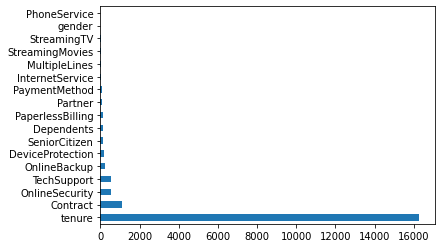

In [ ]:
#Chi Square Independency Testing  
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
k=len(catdf.columns)
test = SelectKBest(score_func=chi2, k=k) 
fit = test.fit(catdf, y)
fit.scores_

imp = pd.Series(fit.scores_, index= catdf.columns)
imp.nlargest(k).plot(kind="barh")
plt.show()

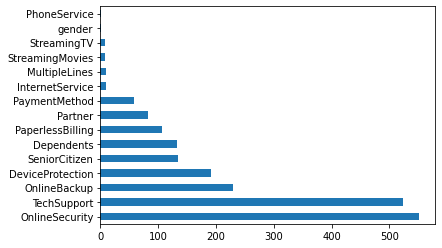

In [ ]:
#Chi Square Independency Testing after removing tenure and Contract to see the better picture
cat_df =catdf.drop(['tenure', 'Contract'], axis=1)

k=len(cat_df.columns)
test = SelectKBest(score_func=chi2, k=k) 
fit = test.fit(cat_df, y)
fit.scores_

imp = pd.Series(fit.scores_, index= cat_df.columns)
imp.nlargest(k).plot(kind="barh")
plt.show()

In [ ]:
# It is better drop the columns that scores lower than Payment Method (but I will keep the Internetservice) 
new_catdf = catdf.drop(['PhoneService', 'gender', 'StreamingTV', 'MultipleLines'], axis=1)

In [ ]:
#One hot encoding for categorical variables
new_dummydf = pd.get_dummies(new_catdf, columns=['SeniorCitizen','InternetService', 'Partner','Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod'], drop_first = True)


In [ ]:
#Generating X Data set after Feature Reduction
X = pd.concat([new_dummydf,numdf], axis=1 )
X.head()

,tenure,SeniorCitizen_1,InternetService_1,InternetService_2,Partner_1,Dependents_1,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_1,OnlineBackup_2,DeviceProtection_1,DeviceProtection_2,TechSupport_1,TechSupport_2,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,0,1
0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,-1.160323,-0.992611
1,34,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,-0.259629,-0.172165
2,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,-0.362660,-0.958066
3,45,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,-0.746535,-0.193672
4,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.197365,-0.938874


In [ ]:
#Data Set Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2)

In [ ]:
#Models Library
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
#SMOTE library
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
#SMOTE Techniques with Logistic Regression

#Define Smote Models
def smote_Logmodels():
  
  steps = list()
  smote_names = list()
  model1= LogisticRegression()
  under = RandomUnderSampler()


  #1.SMOTE
  over1 = SMOTE()
  step11 = [('o', over1), ('u', under), ('m', model1)]
  steps.append(step11)
  smote_names.append("SMOTE")


  #2. SVMSMOTE
  over2 = SVMSMOTE()
  step12 = [('o', over2), ('u', under), ('m', model1)]
  steps.append(step12)
  smote_names.append("SVMMOTE")

  
  #3. KMeansSMOTE
  over3 = KMeansSMOTE()
  step13 = [('o', over3), ('u', under), ('m', model1)]
  steps.append(step13)
  smote_names.append("KMeansSMOTE")


  #4. BorderlineSMOTE
  over4 = BorderlineSMOTE()
  step14 = [('o', over4), ('u', under), ('m', model1)]
  steps.append(step14)
  smote_names.append("BorderlineSMOTE")


  #5. SMOTENC (SMOTE for Nominal and Categorical variables)
  over5 = SMOTENC(categorical_features=[0, 20])
  step15 = [('o', over5), ('u', under), ('m', model1)]
  steps.append(step15)
  smote_names.append("SMOTENC")


  #6. SMOTE with Tomek Links 
  resample=TomekLinks(sampling_strategy='majority')
  step16 = [('r', resample), ('m', model1)]
  steps.append(step16)
  smote_names.append("SMOTE_TOMEK")


  #7. SMOTE with EditedNearestNeighbours
  undersample = EditedNearestNeighbours(n_neighbors=3)
  step17 = [('u', undersample), ('m', model1)]
  steps.append(step17)
  smote_names.append("SMOTE_ENN")

  return steps, smote_names


In [ ]:
# Define Pipelines
def pipelines_log():
  pipelines_log= list()
  for step in smote_Logmodels()[0]:
    pip=Pipeline(steps=step)
    pip=pipelines_log.append(pip)

  return pipelines_log

In [ ]:
def get_scores(pipe):

  pipe.fit(X_train, y_train)
  pred= pipe.predict(X_test)
  score= round(pipe.score(X_test, y_test),3)
  recall=round(recall_score(y_test,pred),3)
  precision=round(precision_score(y_test,pred),3)
  F1 = round((2 * precision * recall) / (precision + recall),3)
  
  return score , recall, precision, F1

In [ ]:
def fit_logmodel():
  
  scores={}  
  for ind, pipe in enumerate(pipelines_log()):
    scores[smote_Logmodels()[1][ind]] = get_scores(pipe)

  return scores

In [ ]:
Log_Result = fit_logmodel()
Log_Result

{'BorderlineSMOTE': (0.746, 0.788, 0.513, 0.621),
 'KMeansSMOTE': (0.783, 0.745, 0.57, 0.646),
 'SMOTE': (0.763, 0.771, 0.537, 0.633),
 'SMOTENC': (0.76, 0.805, 0.532, 0.641),
 'SMOTE_ENN': (0.735, 0.839, 0.501, 0.627),
 'SMOTE_TOMEK': (0.802, 0.627, 0.626, 0.626),
 'SVMMOTE': (0.764, 0.79, 0.537, 0.639)}

In [ ]:
#SMOTE Techniques with XGBoost

#Define Smote Models
def smote_Xgbmodels():
  
  steps = list()
  smote_names = list()
  model2= XGBClassifier(n_estimators=100)
  under = RandomUnderSampler()


  #1.SMOTE
  over1 = SMOTE()
  step11 = [('o', over1), ('u', under), ('m', model2)]
  steps.append(step11)
  smote_names.append("SMOTE")


  #2. SVMSMOTE
  over2 = SVMSMOTE()
  step12 = [('o', over2), ('u', under), ('m', model2)]
  steps.append(step12)
  smote_names.append("SVMMOTE")

  
  #3. KMeansSMOTE
  over3 = KMeansSMOTE()
  step13 = [('o', over3), ('u', under), ('m', model2)]
  steps.append(step13)
  smote_names.append("KMeansSMOTE")


  #4. BorderlineSMOTE
  over4 = BorderlineSMOTE()
  step14 = [('o', over4), ('u', under), ('m', model2)]
  steps.append(step14)
  smote_names.append("BorderlineSMOTE")


  #5. SMOTENC (SMOTE for Nominal and Categorical variables)
  over5 = SMOTENC(categorical_features=[0, 20])
  step15 = [('o', over5), ('u', under), ('m', model2)]
  steps.append(step15)
  smote_names.append("SMOTENC")


  #6. SMOTE with Tomek Links 
  resample=TomekLinks(sampling_strategy='majority')
  step16 = [('r', resample), ('m', model2)]
  steps.append(step16)
  smote_names.append("SMOTE_TOMEK")


  #7. SMOTE with EditedNearestNeighbours
  undersample = EditedNearestNeighbours(n_neighbors=3)
  step17 = [('u', undersample), ('m', model2)]
  steps.append(step17)
  smote_names.append("SMOTE_ENN")

  return steps, smote_names

In [ ]:
# Define Pipelines
def pipelines_xgb():
  pipelines= list()
  for step in smote_Xgbmodels()[0]:
    pip=Pipeline(steps=step)
    pip=pipelines.append(pip)

  return pipelines

In [ ]:
def fit_Xgbmodel():
  
  scores={}  
  for ind, pipe in enumerate(pipelines_xgb()):
    scores[smote_Xgbmodels()[1][ind]] = get_scores(pipe)

  return scores

In [ ]:
XGB_Result = fit_Xgbmodel()
XGB_Result

{'BorderlineSMOTE': (0.756, 0.786, 0.527, 0.631),
 'KMeansSMOTE': (0.794, 0.621, 0.609, 0.615),
 'SMOTE': (0.769, 0.769, 0.546, 0.639),
 'SMOTENC': (0.766, 0.756, 0.542, 0.631),
 'SMOTE_ENN': (0.747, 0.839, 0.514, 0.637),
 'SMOTE_TOMEK': (0.811, 0.619, 0.651, 0.635),
 'SVMMOTE': (0.767, 0.784, 0.542, 0.641)}

In [ ]:
#SMOTE Techniques with  Gradient Boosting

#Define Smote Models
def smote_Gbmodels():
  
  steps = list()
  smote_names = list()
  model3= GradientBoostingClassifier(n_estimators=100)
  under = RandomUnderSampler()


  #1.SMOTE
  over1 = SMOTE()
  step11 = [('o', over1), ('u', under), ('m', model3)]
  steps.append(step11)
  smote_names.append("SMOTE")


  #2. SVMSMOTE
  over2 = SVMSMOTE()
  step12 = [('o', over2), ('u', under), ('m', model3)]
  steps.append(step12)
  smote_names.append("SVMMOTE")

  
  #3. KMeansSMOTE
  over3 = KMeansSMOTE()
  step13 = [('o', over3), ('u', under), ('m', model3)]
  steps.append(step13)
  smote_names.append("KMeansSMOTE")


  #4. BorderlineSMOTE
  over4 = BorderlineSMOTE()
  step14 = [('o', over4), ('u', under), ('m', model3)]
  steps.append(step14)
  smote_names.append("BorderlineSMOTE")


  #5. SMOTENC (SMOTE for Nominal and Categorical variables)
  over5 = SMOTENC(categorical_features=[0, 20])
  step15 = [('o', over5), ('u', under), ('m', model3)]
  steps.append(step15)
  smote_names.append("SMOTENC")


  #6. SMOTE with Tomek Links 
  resample=TomekLinks(sampling_strategy='majority')
  step16 = [('r', resample), ('m', model3)]
  steps.append(step16)
  smote_names.append("SMOTE_TOMEK")


  #7. SMOTE with EditedNearestNeighbours
  undersample = EditedNearestNeighbours(n_neighbors=3)
  step17 = [('u', undersample), ('m', model3)]
  steps.append(step17)
  smote_names.append("SMOTE_ENN")

  return steps, smote_names

In [ ]:
# Define Pipelines
def pipelines_gb():
  pipelines= list()
  for step in smote_Gbmodels()[0]:
    pip=Pipeline(steps=step)
    pip=pipelines.append(pip)

  return pipelines

In [ ]:
def fit_Gbmodel():
  
  scores={}  
  for ind, pipe in enumerate(pipelines_gb()):
    scores[smote_Gbmodels()[1][ind]] = get_scores(pipe)

  return scores

In [ ]:
GB_Result = fit_Gbmodel()
GB_Result

{'BorderlineSMOTE': (0.753, 0.794, 0.523, 0.631),
 'KMeansSMOTE': (0.8, 0.63, 0.622, 0.626),
 'SMOTE': (0.777, 0.771, 0.557, 0.647),
 'SMOTENC': (0.766, 0.741, 0.543, 0.627),
 'SMOTE_ENN': (0.742, 0.846, 0.508, 0.635),
 'SMOTE_TOMEK': (0.806, 0.623, 0.638, 0.63),
 'SVMMOTE': (0.763, 0.782, 0.536, 0.636)}

In [ ]:
comparison3_df= pd.DataFrame({
    "Model" :            ["LOG BorderlineSMOTE",                  "LOG KMeansSMOTE",                        "LOG SMOTE",                        "LOG SMOTENC",                       "LOG SMOTE_ENN",                   "LOG SMOTE_TOMEK",                     "LOG SVMMOTE",                         "XGB BorderlineSMOTE",                          "XGB KMeansSMOTE",                "XGB SMOTE",                           "XGB SMOTENC",                   "XGB SMOTE_ENN",                      "XGB SMOTE_Tomek",                    "XGB SVMSMOTE",                   "GB BorderlineSMOTE",                             "GB KMeansSMOTE",                  "GB SMOTE",                    "GB SMOTENC",                              "GB_SMOTE_ENN"  ,                "GB SMOTE_TOMEK",               "GB SVMMOTE"],
    "Accuracy Scores"   :[Log_Result.get( 'BorderlineSMOTE')[0],       Log_Result.get( 'KMeansSMOTE')[0],   Log_Result.get( 'SMOTE')[0],         Log_Result.get( 'SMOTENC')[0],       Log_Result.get( 'SMOTE_ENN')[0],   Log_Result.get( 'SMOTE_TOMEK')[0],    Log_Result.get( 'SVMMOTE')[0],    XGB_Result.get( 'BorderlineSMOTE')[0],       XGB_Result.get( 'KMeansSMOTE')[0],    XGB_Result.get( 'SMOTE')[0],         XGB_Result.get( 'SMOTENC')[0],       XGB_Result.get( 'SMOTE_ENN')[0],   XGB_Result.get( 'SMOTE_TOMEK')[0],    XGB_Result.get( 'SVMMOTE')[0],      GB_Result.get( 'BorderlineSMOTE')[0],       GB_Result.get( 'KMeansSMOTE')[0],    GB_Result.get( 'SMOTE')[0],         GB_Result.get( 'SMOTENC')[0],       GB_Result.get('SMOTE_ENN')[0],     GB_Result.get('SMOTE_TOMEK')[0],    GB_Result.get( 'SVMMOTE')[0]],
    "Recall Scores"   :  [Log_Result.get( 'BorderlineSMOTE')[1],       Log_Result.get( 'KMeansSMOTE')[1],   Log_Result.get( 'SMOTE')[1],         Log_Result.get( 'SMOTENC')[1],       Log_Result.get( 'SMOTE_ENN')[1],   Log_Result.get( 'SMOTE_TOMEK')[1],    Log_Result.get( 'SVMMOTE')[1],    XGB_Result.get( 'BorderlineSMOTE')[1],       XGB_Result.get( 'KMeansSMOTE')[1],    XGB_Result.get( 'SMOTE')[1],         XGB_Result.get( 'SMOTENC')[1],       XGB_Result.get( 'SMOTE_ENN')[1],   XGB_Result.get( 'SMOTE_TOMEK')[1],    XGB_Result.get( 'SVMMOTE')[1],      GB_Result.get( 'BorderlineSMOTE')[1],       GB_Result.get( 'KMeansSMOTE')[1],    GB_Result.get( 'SMOTE')[1],         GB_Result.get( 'SMOTENC')[1],       GB_Result.get('SMOTE_ENN')[1],     GB_Result.get('SMOTE_TOMEK')[1],    GB_Result.get( 'SVMMOTE')[1]],
    "Precision Scores" : [Log_Result.get( 'BorderlineSMOTE')[2],       Log_Result.get( 'KMeansSMOTE')[2],   Log_Result.get( 'SMOTE')[2],         Log_Result.get( 'SMOTENC')[2],       Log_Result.get( 'SMOTE_ENN')[2],   Log_Result.get( 'SMOTE_TOMEK')[2],    Log_Result.get( 'SVMMOTE')[2],    XGB_Result.get( 'BorderlineSMOTE')[2],       XGB_Result.get( 'KMeansSMOTE')[2],    XGB_Result.get( 'SMOTE')[2],         XGB_Result.get( 'SMOTENC')[2],       XGB_Result.get( 'SMOTE_ENN')[2],   XGB_Result.get( 'SMOTE_TOMEK')[2],    XGB_Result.get( 'SVMMOTE')[2],      GB_Result.get( 'BorderlineSMOTE')[2],       GB_Result.get( 'KMeansSMOTE')[2],    GB_Result.get( 'SMOTE')[2],         GB_Result.get( 'SMOTENC')[2],       GB_Result.get('SMOTE_ENN')[2],     GB_Result.get('SMOTE_TOMEK')[2],    GB_Result.get( 'SVMMOTE')[2]],
    "F1 Scores" :        [Log_Result.get( 'BorderlineSMOTE')[3],       Log_Result.get( 'KMeansSMOTE')[3],   Log_Result.get( 'SMOTE')[3],         Log_Result.get( 'SMOTENC')[3],       Log_Result.get( 'SMOTE_ENN')[3],   Log_Result.get( 'SMOTE_TOMEK')[3],    Log_Result.get( 'SVMMOTE')[3],    XGB_Result.get( 'BorderlineSMOTE')[3],       XGB_Result.get( 'KMeansSMOTE')[3],    XGB_Result.get( 'SMOTE')[3],         XGB_Result.get( 'SMOTENC')[3],       XGB_Result.get( 'SMOTE_ENN')[3],   XGB_Result.get( 'SMOTE_TOMEK')[3],    XGB_Result.get( 'SVMMOTE')[3],      GB_Result.get( 'BorderlineSMOTE')[3],       GB_Result.get( 'KMeansSMOTE')[3],    GB_Result.get( 'SMOTE')[3],         GB_Result.get( 'SMOTENC')[3],      GB_Result.get('SMOTE_ENN')[3],     GB_Result.get('SMOTE_TOMEK')[3],    GB_Result.get( 'SVMMOTE')[3]],
     
})
comparison3_df= comparison3_df.sort_values(["F1 Scores" ], ascending=False)

comparison3_df

,Model,Accuracy Scores,Recall Scores,Precision Scores,F1 Scores
16,GB SMOTE,0.777,0.771,0.557,0.647
1,LOG KMeansSMOTE,0.783,0.745,0.570,0.646
3,LOG SMOTENC,0.760,0.805,0.532,0.641
13,XGB SVMSMOTE,0.767,0.784,0.542,0.641
6,LOG SVMMOTE,0.764,0.790,0.537,0.639
9,XGB SMOTE,0.769,0.769,0.546,0.639
11,XGB SMOTE_ENN,0.747,0.839,0.514,0.637
20,GB SVMMOTE,0.763,0.782,0.536,0.636
12,XGB SMOTE_Tomek,0.811,0.619,0.651,0.635
18,GB_SMOTE_ENN,0.742,0.846,0.508,0.635


In [ ]:
# Looks like SMOTE and KMeansSMOTE returns the highest F1 scores followed by SMOTENC.
